<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Time Series
</h2>
</div>    
</center>

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Exploratory Data Analysis](#eda)
- ### [Model](#model)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">AR (AutoRegressive)
</h2>
</div>

To make a forecast based on our time series we will use the AutoRegressive model. Based on the past values in the series - called lags, AR relies on the time series to being stationary. \
An AR model, that depends on a lag in the past - called an **AR model of order one** or AR(1).

$$Y_{t} = \omega + \phi_{1}Y_{t-1} + \varepsilon_{t}$$

- $Y_{t}$ - Target, $Y_{t-1}$ - Lagged Target, $\varepsilon_{t}$ - Error
- $\omega$ - intercept, $\phi$ - constant(coefficient)

This recursion (lagged target going back to the previous data point) in time goes back until the beginning of the series, so these are called **Long Memory Models**.

$$\begin{aligned}
Y_{t} &= \omega + \phi Y_{t-1} + \varepsilon_{t} \\
Y_{t-1} &= \omega + \phi Y_{t-2} + \varepsilon_{t-1} \\
\downarrow \\
Y_{t} &= \omega^{*} + \phi^{2} Y_{t-2} + \phi \varepsilon_{t-1} + \varepsilon_{t}  \\
\\
Y_{t-2} &= \omega + \phi Y_{t-3} + \varepsilon_{t-2} \\
\downarrow \\
Y_{t} &= \omega^{*} + \phi^{3} Y_{t-3} + \phi^{2} \varepsilon_{t-2} + \phi \varepsilon_{t-1} + \varepsilon_{t} \\
\end{aligned}
$$

If we continued to insert the previous observations, we would arrive at the first observation, and with each step the effect of the previous values would decrease IF $|\phi| < 1$. \
This goes back to the idea of stationary - the dependence of previous observations declines over time.

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">MA (Moving Average)
</h2>
</div>

Instead of looking at the previous lagged target value, we'll make use of the lagged error.\
An MA model, that depends on a lag error in the past - called an **MA model of order one** or MA(1).

$$Y_{t} = \omega + \theta_{1}\varepsilon_{t - 1} + \varepsilon_{t}$$

To avoid the first prediction leak (we don't have a prediction for the first observation), we use the average of the time series.\
MA models are **Short Memory Models** - these errors don't last long into the future.

$$\begin{aligned}
Y_{t - 1} &= \omega + \theta \varepsilon_{t-2} + \varepsilon_{t-1}\\
Y_{t} &= \omega + \theta \varepsilon_{t - 1} + \varepsilon_{t}\\
Y_{t + 1} &= \omega + \theta \varepsilon_{t} + \varepsilon_{t+1}\\
\end{aligned}
$$

This goes back to the idea of stationarity - the dependence of previous observations decline over time.
In **MA(1)** models, the effect of shocks has NO effect on the present if they happened long enough ago.

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">ARIMA
</h2>
</div>

**ARIMA** - AR + I + MA

$$Y_{t} = \omega + \phi_{1}Y_{t - 1} + ... + \phi_{p}Y_{t - p} + \theta_{t}\varepsilon_{t-1} + ... + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}$$

- **I** - integrated. Essentially, you need to make your data stationary (by differencing the time series). Distribution depends only on difference in time, not location in time.

**Example with selected orders:**
ARIMA (1, 1, 1) (p, d, q)
- *d* → $Y_{t} - Y_{t - 1} = W_{t}$
- *p, q* → $W_{t} = \omega + \phi_{1}W_{t-1} + \theta_{1}\varepsilon_{t - 1} + \varepsilon_{t}$

**Deciding how many orders (p, q)**\
Couple of different **techniques to selecting models**:
1. Plotting patterns in correlation
2. Automatic selection techniques

[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp

import statsmodels.api as sm

import warnings
warnings.filterwarnings(action = 'ignore')

## Data

In [256]:
df = pd.read_csv('assets/time_series/store_sales.csv')

# Get rid off unnecessary columns
df = df[df.columns[2:]]
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   item_nbr     int64  
 3   unit_sales   float64
 4   onpromotion  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 190.7+ MB


In [258]:
# Change date column type
df['date'] = pd.to_datetime(df['date'])

# Get date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select the most saled item
max_item_sales = df['item_nbr'].value_counts().index[0]
df_item = df[df['item_nbr'] == max_item_sales]

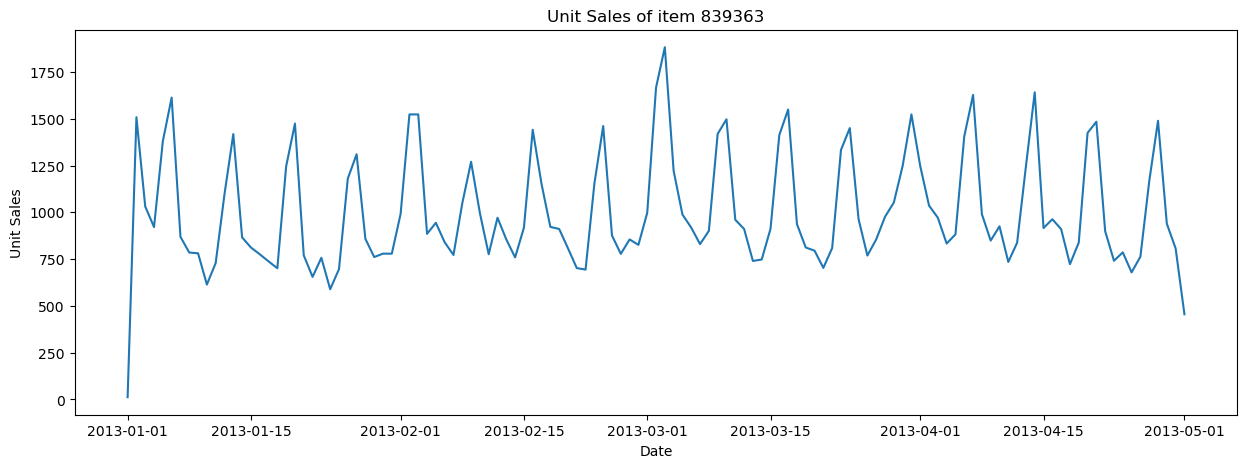

In [259]:
# Groupby date to create a time series dataframe
df_time = df_item.groupby(['date']).agg({'unit_sales':'sum'}).sort_index()

# Plot the time series
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.lineplot(df_time['unit_sales'])
ax.set_title(f'Unit Sales of item {max_item_sales}')
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
plt.show()

### Distribution

[DIST 1] - [DIST 2]: 0.449 , [MEAN]: 922.54 - 949.17, [STD]: 366.04 - 211.63
[DIST 2] - [DIST 3]: 0.686 , [MEAN]: 949.17 - 1050.88, [STD]: 211.63 - 270.58
[DIST 1] - [DIST 3]: 0.068 , [MEAN]: 922.54 - 1050.88, [STD]: 366.04 - 270.58


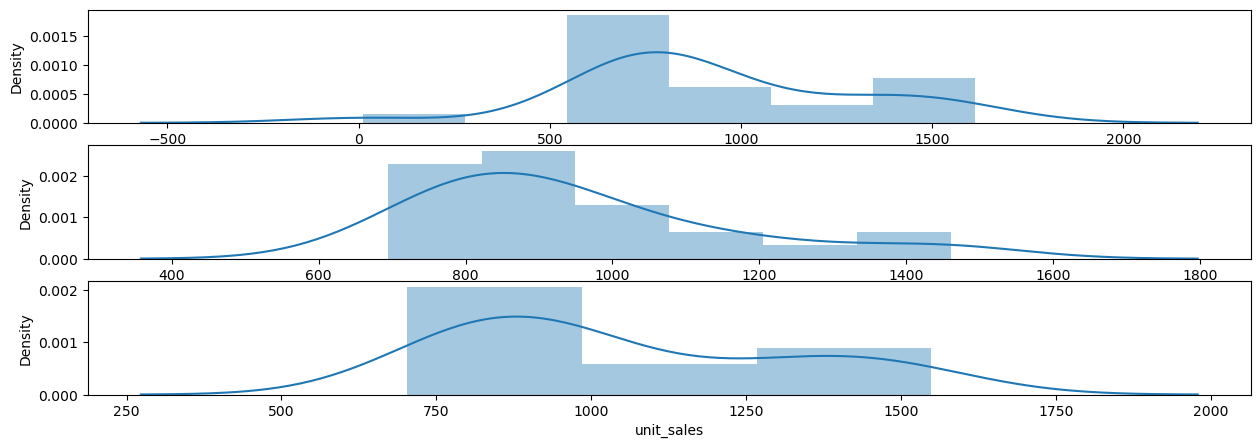

In [260]:
dist_split_1 = df_time.iloc[int(len(df_time)*.0):int(len(df_time)*.2)]['unit_sales']
dist_split_2 = df_time.iloc[int(len(df_time)*.3):int(len(df_time)*.5)]['unit_sales']
dist_split_3 = df_time.iloc[int(len(df_time)*.6):int(len(df_time)*.8)]['unit_sales']

print(f'[DIST 1] - [DIST 2]: {ks_2samp(dist_split_1, dist_split_2)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_2.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_2.std():.2f}')
print(f'[DIST 2] - [DIST 3]: {ks_2samp(dist_split_2, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_2.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_2.std():.2f} - {dist_split_3.std():.2f}')
print(f'[DIST 1] - [DIST 3]: {ks_2samp(dist_split_1, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_3.std():.2f}')

fig, ax = plt.subplots(3, 1, figsize = (15,5))
sns.distplot(dist_split_1, ax = ax[0])
sns.distplot(dist_split_2, ax = ax[1])
sns.distplot(dist_split_3, ax = ax[2])
plt.show()

### Stationary

In [261]:
def adfuller_test(series):
    adfuller_test = adfuller(series)
    print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
    print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_test[1]:.4f}')
    print(f'3. Lags used for regression: {adfuller_test[2]}')
    print(f'4. Observations used in the analysis: {adfuller_test[3]}')
    print(f'5. T-values corresponding to Adfuller Test:')
    for key, val in adfuller_test[4].items():
        print(f'\t ► {key} : {val:.2f}')

    if adfuller_test[1] <= .05:
        print(f'→ The TIME SERIES is stationary')
    else:
        print(f'→ The TIME SERIES is NOT stationary')

In [262]:
# Run Adfuller test to check if the time series is stationary
adfuller_test(df_time['unit_sales'])

1. ADF - Critical Value: -1.74
2. P-Value: Reject HA (NOT reject H0): 0.4108
3. Lags used for regression: 13
4. Observations used in the analysis: 107
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.49
	 ► 5% : -2.89
	 ► 10% : -2.58
→ The TIME SERIES is NOT stationary


In [263]:
# Differencing time series
df_time['diff'] = df_time['unit_sales'].diff()
mean_sales = abs(df_time['diff']).mean()
df_time['diff'] = df_time['diff'].fillna(mean_sales)

adfuller_test(df_time['diff'])

1. ADF - Critical Value: -5.18
2. P-Value: Reject HA (NOT reject H0): 0.0000
3. Lags used for regression: 12
4. Observations used in the analysis: 108
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.49
	 ► 5% : -2.89
	 ► 10% : -2.58
→ The TIME SERIES is stationary


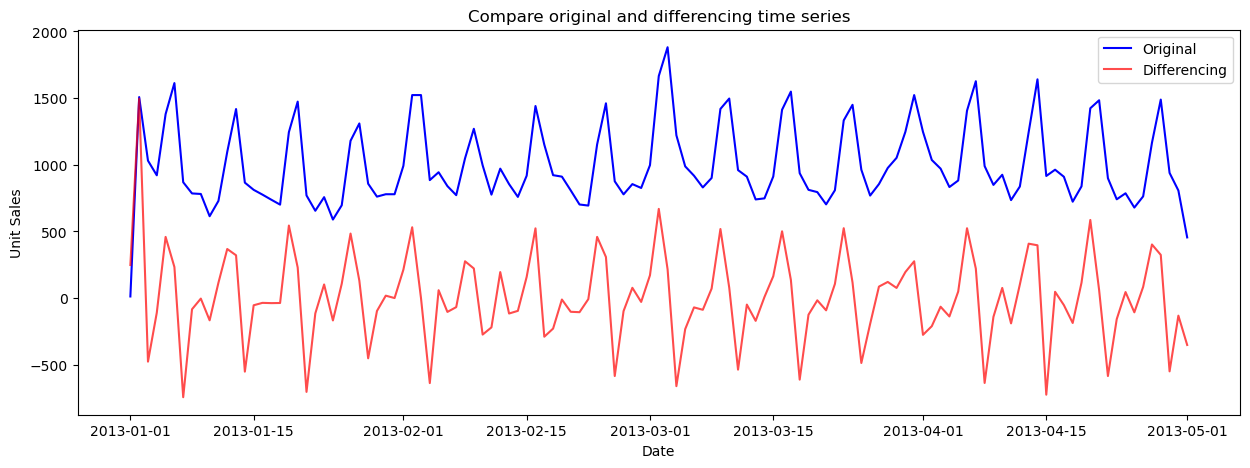

In [264]:
# Plot the time series
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.lineplot(df_time['unit_sales'], color = 'b', label = 'Original')
sns.lineplot(df_time['diff'], color = 'r', alpha = .7, label = 'Differencing')
ax.set_title(f'Compare original and differencing time series')
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
plt.show()

In [265]:
# Using differencing method
#df_time['unit_sales'].diff()

# Using inverse-differencing time series
#np.array(np.r_[df_time['diff_pd'][0], df_time['diff_pd'][1:]].cumsum())

### Train and Test

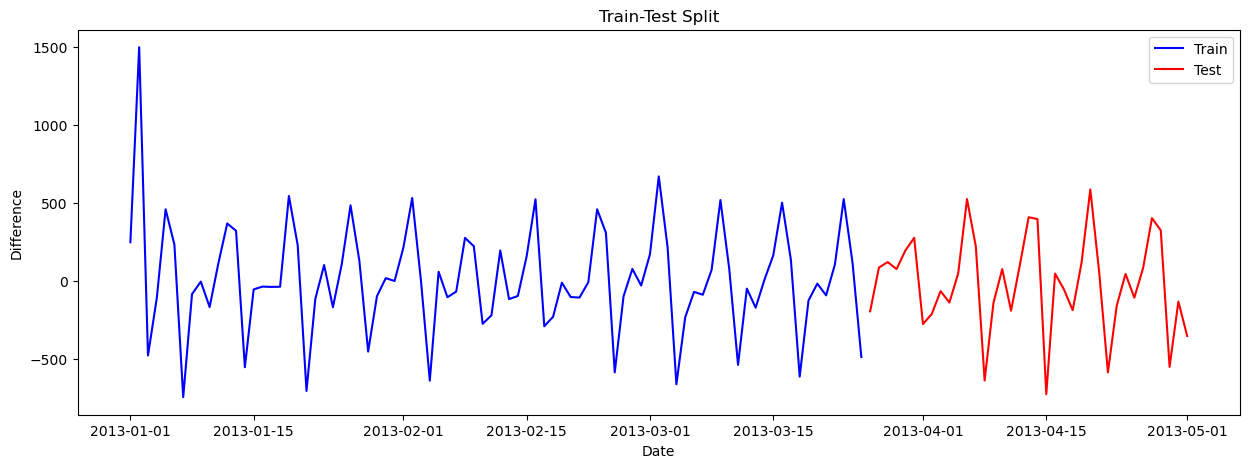

In [266]:
# Create lagged features
for shift in range(7, 14):
    mean_shift = round(abs(df_time['diff'][shift:shift*2]).mean(), 2)
    df_time['shift'+str(shift)] = df_time['diff'].shift(shift).fillna(mean_shift)

# Train Test Split
train, test = np.split(df_time, [int(len(df_time)*0.7)])
x_train, y_train =  train.drop(columns = ['diff']), train['diff']
x_test, y_test =  test.drop(columns = ['diff']), test['diff']

# Plot the time series
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.lineplot(train['diff'], color = 'b', label = 'Train')
sns.lineplot(test['diff'], color = 'r', label = 'Test')
ax.set_title(f'Train-Test Split')
ax.set_xlabel('Date')
ax.set_ylabel('Difference')
plt.show()

### ACF and PACF

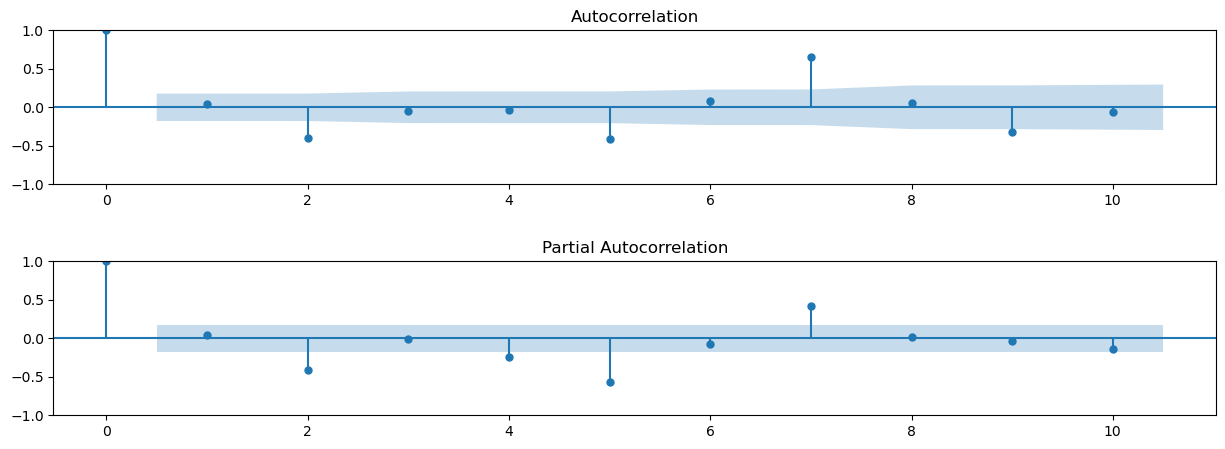

In [267]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize = (15, 5))
plot_acf(df_time['diff'], lags = 10, ax = ax[0])
plot_pacf(df_time['diff'], lags = 10, ax = ax[1])
fig.subplots_adjust(hspace = .5, wspace = .5)
plt.show()

[UP](#toc)

<a id = 'model'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Model
</h2>
</div>    
</center>

- [AR](#model_ar)
- [MA](#model_ma)
- [LinearRegression](#model_lin)
- [ARIMA](#model_arima)

<a id = 'model_ar'></a>
<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">AR
</h2>
</div>

In [268]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order


# Choose selected lags/orders
selected_lags = ar_select_order(train['diff'], maxlag = 12).ar_lags
print(f'Number of Lags: {selected_lags}')

# Autoregressive model
model = AutoReg(train['diff'], lags = selected_lags).fit()
print(model.summary())

Number of Lags: [1, 2, 3, 4, 5, 6, 7]
                            AutoReg Model Results                             
Dep. Variable:                   diff   No. Observations:                   84
Model:                     AutoReg(7)   Log Likelihood                -497.124
Method:               Conditional MLE   S.D. of innovations            154.040
Date:                Sat, 27 Apr 2024   AIC                           1012.248
Time:                        19:04:06   BIC                           1033.342
Sample:                    01-08-2013   HQIC                          1020.685
                         - 03-25-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9926     17.585     -0.455      0.649     -42.459      26.474
diff.L1       -0.3151      0.107     -2.958      0.003      -0.524      -0.106
diff.L2       

[RMSE]: 212.37, [MAPE]: 1.59


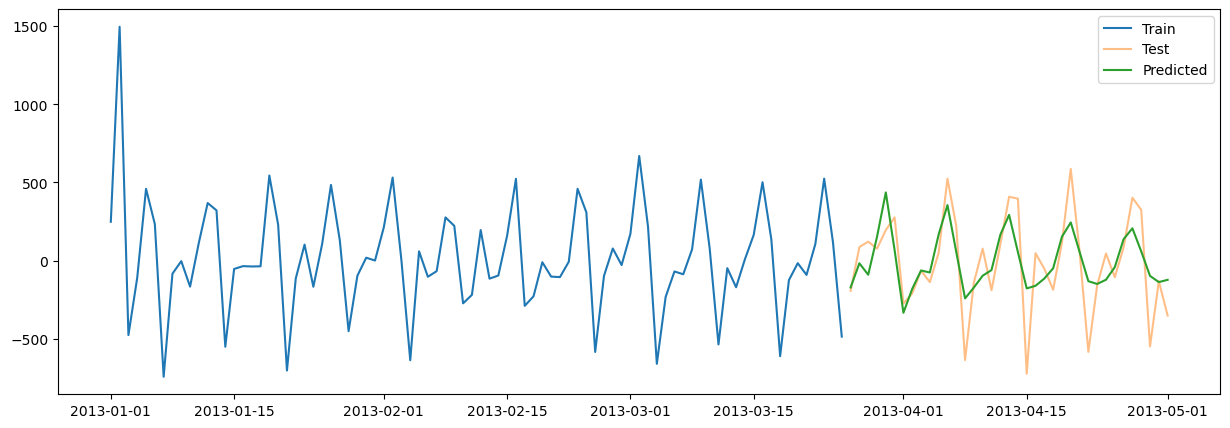

In [269]:
# Forecast
pred = pd.DataFrame(model.predict(start = len(train), end = len(df_time) - 1
                                  , dynamic = False), columns = ['pred'])
pred = pred.set_index(x_test.index)

# RMSE and MAPE
rmse_ar = np.sqrt(mean_squared_error(pred['pred'], test['diff']))
mape_ar = mean_absolute_percentage_error(pred['pred'], test['diff'])

print(f'[RMSE]: {rmse_ar:.2f}, [MAPE]: {mape_ar:.2f}')

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(train.index, train['diff'])
ax.plot(test.index, test['diff'], alpha = .5)
ax.plot(pred.index, pred['pred'])
ax.legend(['Train', 'Test', 'Predicted'])
plt.show()

<a id = 'model_ma'></a>
<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">MA
</h2>
</div>

In [270]:
from statsmodels.tsa.arima.model import ARIMA

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                   84
Model:                ARIMA(0, 0, 10)   Log Likelihood                -578.275
Date:                Sat, 27 Apr 2024   AIC                           1180.550
Time:                        19:04:07   BIC                           1209.719
Sample:                    01-01-2013   HQIC                          1192.276
                         - 03-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5915     15.552      0.874      0.382     -16.889      44.072
ma.L1         -0.1863      0.229     -0.815      0.415      -0.635       0.262
ma.L2         -0.6568      0.281     -2.336      0.0

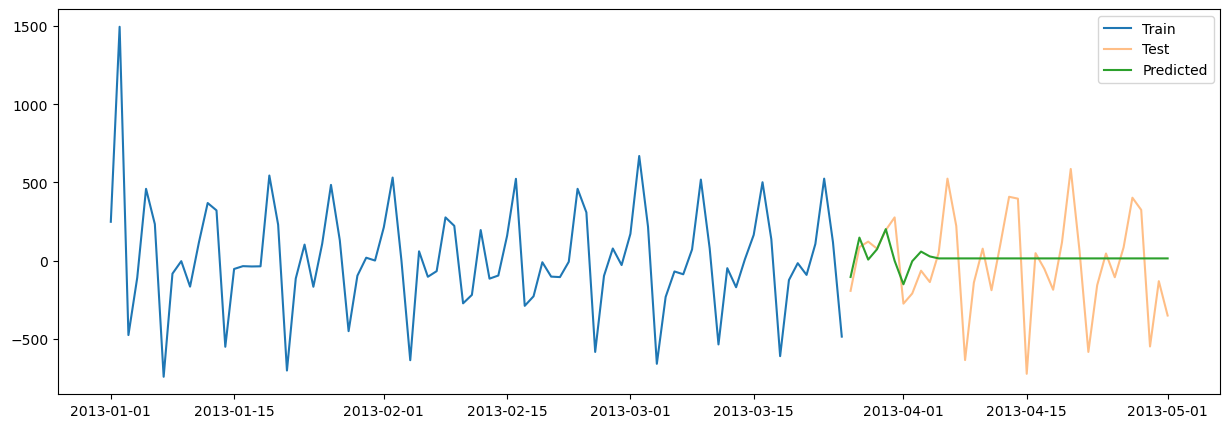

In [271]:
# Use ARIMA to forecast values based on the MA order
model = ARIMA(endog = train['diff'], order = (0, 0, 10)).fit()
print(model.summary())

# Forecast
pred = pred = pd.DataFrame(np.array(model.predict(start = len(train)
                                                  , end = len(df_time) - 1)), columns = ['pred'])
pred = pred.set_index(test.index)

# RMSE and MAPE
rmse_ma = np.sqrt(mean_squared_error(pred['pred'], test['diff']))
mape_ma = mean_absolute_percentage_error(pred['pred'], test['diff'])

print(f'[RMSE]: {rmse_ma:.2f}, [MAPE]: {mape_ma:.2f}')

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(train.index, train['diff'])
ax.plot(test.index, test['diff'], alpha = .5)
ax.plot(pred.index, pred['pred'])
ax.legend(['Train', 'Test', 'Predicted'])
plt.show()

<a id = 'model_lin'></a>
<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">LinearRegression
</h2>
</div>

[INTERCEPT]: 6.42, [COEF]: [ 0.53560259  0.03943051 -0.11928799 -0.09569159  0.00062742 -0.17024904
  0.09716168]
[RMSE]: 180.50, [MAPE]: 2.38


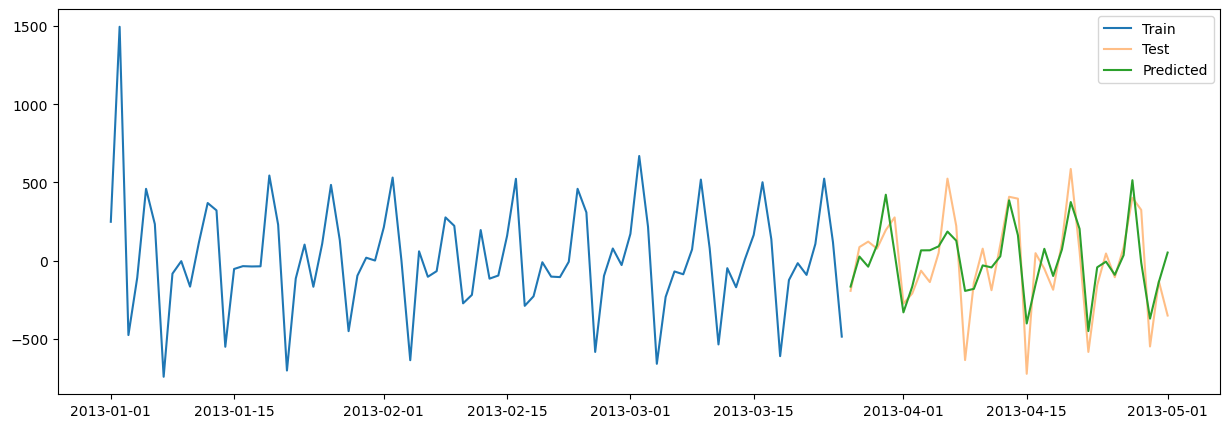

In [272]:
# LinearRegression
model = LinearRegression()
model.fit(x_train.drop(columns = ['unit_sales']), y_train)

# Prediction
pred = pd.DataFrame(model.predict(x_test.drop(columns = ['unit_sales'])), columns = ['pred'])
pred = pred.set_index(test.index)

print(f'[INTERCEPT]: {model.intercept_:.2f}, [COEF]: {model.coef_}')

# RMSE and MAPE
rmse_lin = np.sqrt(mean_squared_error(pred['pred'], test['diff']))
mape_lin = mean_absolute_percentage_error(pred['pred'], test['diff'])

print(f'[RMSE]: {rmse_lin:.2f}, [MAPE]: {mape_lin:.2f}')

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(train.index, train['diff'])
ax.plot(test.index, test['diff'], alpha = .5)
ax.plot(pred.index, pred['pred'])
ax.legend(['Train', 'Test', 'Predicted'])
plt.show()

<a id = 'model_arima'></a>
<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">ARIMA
</h2>
</div>

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                   84
Model:                 ARIMA(6, 0, 6)   Log Likelihood                -576.648
Date:                Sat, 27 Apr 2024   AIC                           1181.295
Time:                        19:13:34   BIC                           1215.327
Sample:                    01-01-2013   HQIC                          1194.976
                         - 03-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3394     11.257      1.096      0.273      -9.724      34.403
ar.L1         -1.0079      0.034    -29.730      0.000      -1.074      -0.941
ar.L2         -0.9613      0.022    -43.293      0.0

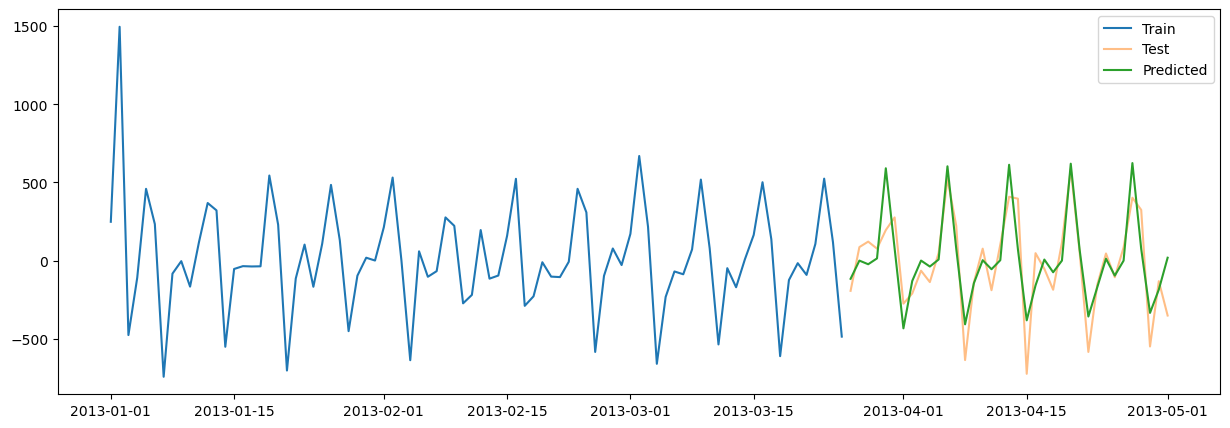

In [284]:
# Use ARIMA to forecast values based on the MA order
model = ARIMA(endog = train['diff'], order = (6, 0, 6)).fit()
print(model.summary())

# Forecast
pred = pred = pd.DataFrame(np.array(model.predict(start = len(train)
                                                  , end = len(df_time) - 1)), columns = ['pred'])
pred = pred.set_index(test.index)

# RMSE and MAPE
rmse_arima = np.sqrt(mean_squared_error(pred['pred'], test['diff']))
mape_arima = mean_absolute_percentage_error(pred['pred'], test['diff'])

print(f'[RMSE]: {rmse_arima:.2f}, [MAPE]: {mape_arima:.2f}')

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(train.index, train['diff'])
ax.plot(test.index, test['diff'], alpha = .5)
ax.plot(pred.index, pred['pred'])
ax.legend(['Train', 'Test', 'Predicted'])
plt.show()

<a id = 'model_result'></a>
<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">Result
</h2>
</div>

In [285]:
rmse = [rmse_ar, rmse_ma, rmse_lin, rmse_arima]
mape = [mape_ar, mape_ma, mape_lin, mape_arima]

pd.DataFrame(np.round([rmse, mape], 2)
             , columns = ['AR', 'MA', 'LinReg', 'ARIMA']
             , index = ['RMSE', 'MAPE'])

,AR,MA,LinReg,ARIMA
RMSE,212.37,301.71,180.50,171.57
MAPE,1.59,21.33,2.38,30.54


[UP](#toc)